In [1]:
import json
import numpy as np

# Function to extract features & labels from a single file
def parse_json_file(file_path):
    features, labels = [], []
    with open(file_path, 'r') as f:
        data = json.load(f)
        for pose in data["poses"]:
            # Extract features
            hand_position = list(pose["handPosition"].values())
            hand_rotation = list(pose["handRotation"].values())
            fingertip_positions = [coord for fingertip in pose["fingerTipPositions"] for coord in fingertip.values()]
            feature_vector = hand_position + hand_rotation + fingertip_positions

            # Add to lists
            features.append(feature_vector)
            labels.append(pose["poseName"])
    return np.array(features), np.array(labels)

file_path = 'D:\TrialData\Trial1.json'
features, labels = parse_json_file(file_path)

print("Feature Shape:", features.shape)
print("Labels:", labels)

Feature Shape: (5, 22)
Labels: ['one' 'two' 'three' 'four' 'five']


In [2]:
import os

# Function to parse all files in a directory
def load_data_from_files(file_paths):
    all_features, all_labels = [], []
    for file_path in file_paths:
        features, labels = parse_json_file(file_path)
        all_features.append(features)
        all_labels.append(labels)
    # Combine all features and labels into single arrays
    return np.vstack(all_features), np.concatenate(all_labels)

# List of all file paths (update with your actual file paths)
file_paths = [
    'D:\TrialData\Trial1.json',
    'D:\TrialData\Trial2.json',
    'D:\TrialData\Trial3.json',
    'D:\TrialData\Trial4.json',
    'D:\TrialData\Trial5.json',
    'D:\TrialData\Trial6.json',
    'D:\TrialData\Trial7.json',
    'D:\TrialData\Trial8.json',
    'D:\TrialData\Trial9.json',
    'D:\TrialData\Trial10.json'
]

# Load data from all files
all_features, all_labels = load_data_from_files(file_paths)

# Print the final dataset shape
print("Combined Features Shape:", all_features.shape)
print("Combined Labels Shape:", all_labels.shape)
print("Unique Labels:", np.unique(all_labels))

Combined Features Shape: (50, 22)
Combined Labels Shape: (50,)
Unique Labels: ['five' 'four' 'one' 'three' 'two']


In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    all_features, all_labels, test_size = 0.2, random_state = 42, stratify = all_labels
)

# Print the split sizes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Lables Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (40, 22)
Testing Features Shape: (10, 22)
Training Lables Shape: (40,)
Testing Labels Shape: (10,)


Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state = 42, n_estimators = 100)

# Train the model
clf.fit(X_train, y_train)

# Print a configuration message
print("Model training complete!")

Model training complete!


In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Classification report
print("Classfication Report:")
print(classification_report(y_test, y_pred)) 

Test Accuracy: 0.60
Classfication Report:
              precision    recall  f1-score   support

        five       1.00      1.00      1.00         2
        four       0.67      1.00      0.80         2
         one       0.50      0.50      0.50         2
       three       1.00      0.50      0.67         2
         two       0.00      0.00      0.00         2

    accuracy                           0.60        10
   macro avg       0.63      0.60      0.59        10
weighted avg       0.63      0.60      0.59        10



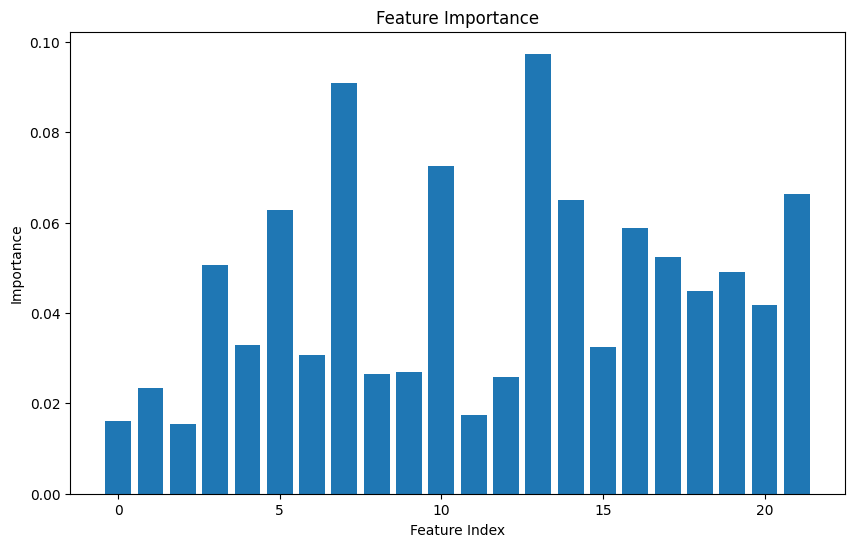

In [13]:
import matplotlib.pyplot as plt

# Feature importance
importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

In [20]:
clf_tuned = RandomForestClassifier(
    n_estimators=300,  # Increase the number of trees
    max_depth=10,      # Limit tree depth to prevent overfitting
    random_state=42
)
clf_tuned.fit(X_train, y_train)

# Evaluate tuned model
y_pred_tuned = clf_tuned.predict(X_test)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(classification_report(y_test, y_pred_tuned))


Tuned Random Forest Accuracy: 0.60
              precision    recall  f1-score   support

        five       1.00      1.00      1.00         2
        four       0.67      1.00      0.80         2
         one       0.50      0.50      0.50         2
       three       1.00      0.50      0.67         2
         two       0.00      0.00      0.00         2

    accuracy                           0.60        10
   macro avg       0.63      0.60      0.59        10
weighted avg       0.63      0.60      0.59        10

